# <p style="text-align: center;"> CS6476 | Computer Vision </p>
<p style="text-align: center;">Alexis Durocher - MSCS student at Georgia Tech</p>
<p style="text-align: center;">Spring 2018</p>


### 1. <u> Input images </u>

In [51]:
## a. 
## Python dependencies
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# input 2 pictures as numpy ndarray
picture_1 = misc.imread('./pictures/ps0-1-a-1.jpg')
picture_2 = misc.imread('./pictures/ps0-1-a-2.jpg')

# Make sure they are not larger than 512*512.
print('Picture 1 is of size : {} x {}'.format(str(picture_1.shape[0]), str(picture_1.shape[1])))
print('Picture 2 is of size : {} x {}'.format(str(picture_2.shape[0]), str(picture_2.shape[1])))

# Output pictures in ./output folder
mpimg.imsave("./output/ps0-1-a-1.jpg", picture_1)
mpimg.imsave("./output/ps0-1-a-2.jpg", picture_2)

Picture 1 is of size : 512 x 512
Picture 2 is of size : 512 x 512


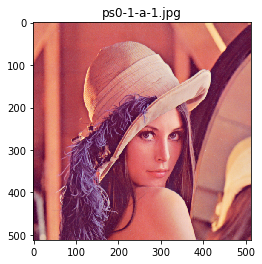

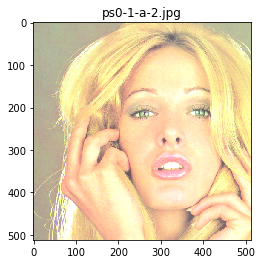

In [52]:
# Plot pictures
plt.imshow(picture_1)
plt.title('ps0-1-a-1.jpg')
plt.show()
plt.imshow(picture_2)
plt.title('ps0-1-a-2.jpg')
plt.show()

###  2. <u> Color planes </u>

In [53]:
## Python dependencies
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt


# input 2 pictures as numpy ndarray
picture_1 = misc.imread('./pictures/ps0-1-a-1.jpg')
picture_2 = misc.imread('./pictures/ps0-1-a-2.jpg')


#### a. Swap red and blue pixels of image 1

In [54]:
picture_temp = picture = picture_1.copy()

# swap red and blue pixels' values
picture[:,:,0] = picture_temp[:,:,2] # red pixel's value <- blue's one
picture[:,:,2] = picture_temp[:,:,0] # blue pixel's value <- red's one

# Output pictures in ./output folder
mpimg.imsave("./output/ps0-2-a-1.jpg", picture)

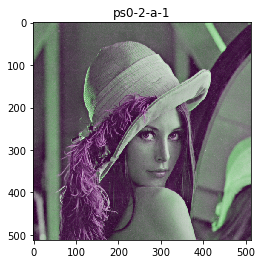

In [55]:
# plot and save result
plt.imshow(picture)
plt.title("ps0-2-a-1")
plt.show()

#### b. Monochrome image 1 (Green)

In [56]:
# set red and blue channel to value 0
mono_g_picture = picture_1.copy()
mono_g_picture[:,:,0] = mono_g_picture[:,:,2] = 0

# Output pictures in ./output folder
mpimg.imsave("./output/ps0-2-b-1.jpg", mono_g_picture)

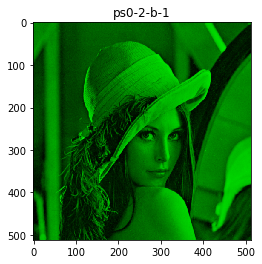

In [57]:
# plot and save result
plt.imshow(mono_g_picture)
plt.title("ps0-2-b-1")
plt.show()

#### c. Monochrome image 1 (Red)

In [58]:
# set green and blue channel to value 0
mono_r_picture = picture_1.copy()
mono_r_picture[:,:,1] = mono_r_picture[:,:,2] = 0

# Output pictures in ./output folder
mpimg.imsave("./output/ps0-2-c-1.jpg", mono_r_picture)

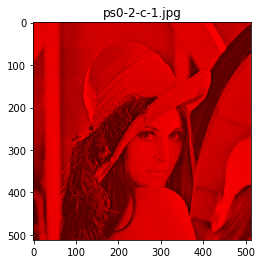

In [59]:
# plot and save result
plt.imshow(mono_r_picture)
plt.title('ps0-2-c-1.jpg')
plt.show()

#### d. Red or Green ?

The red-monochrome looks more homogenous in a monochrome sense as the red pixels 
seem to be more omnipresents in the whole picture and have an average value high
enought to not be considered as black. In the other hand, green-monochrome shows more
heterogeneity, more difference between black and green. <br>
Hence red-monochrome would be my choice regarding the 'best' monochrome picture and 
the green-monochrom the choice for a computer vision algorithm seeking for clearer
differences and shapes.

### 3. Replacement of pixels

#### a.

In [60]:
# We take the inner square of size 100x100 from the M1g (Green Monochrome of image 1)
inner_mg1 = mono_g_picture[205:305, 205:305,:].copy()

print('The size of the mg1 inner square is {} x {}'.format(inner_mg1.shape[0], inner_mg1.shape[1]))

# build M2g (Green Monochrome of image 2)
mono_g2_picture = picture_2.copy()
mono_g2_picture[:,:,0] = mono_g2_picture[:,:,2] = 0

# replace inner square with mg1's one
mono_g2_picture[205:305, 205:305,:] = inner_mg1

mpimg.imsave('./output/ps0-3-a-1.jpg', mono_g2_picture)

The size of the mg1 inner square is 100 x 100


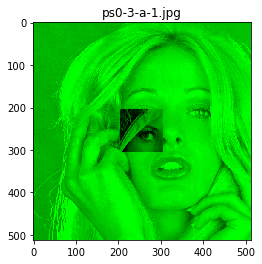

In [61]:
# plot and save result output
plt.imshow(mono_g2_picture)
plt.title('ps0-3-a-1.jpg')
plt.show()

### 4. Arithmetic and Geometric operations

### a. 

In [62]:
green_mg1_values = mono_g_picture[:,:,1].copy()
min_g1_value = np.min(green_mg1_values)
max_g1_value = np.max(green_mg1_values)
mean_g1_value = np.mean(green_mg1_values)
std_g1_value = np.std(green_mg1_values)

print('From the MG1 pixel values : min = {} | max = {} | mean = {} | stand dev = {} '
      .format(min_g1_value, max_g1_value, mean_g1_value, std_g1_value))

From the MG1 pixel values : min = 3 | max = 248 | mean = 99.05121612548828 | stand dev = 52.87751732904626 


To compute these values, it is necessary to consider the pixel values as a unique array, 
here : the green pixel value of all the instances in the picture (green channel).
Then, basic mathematic ops can be applied.

#### b. Operations on mg1

In [63]:
# substracting the mean
green_mg1_values = green_mg1_values - mean_g1_value
# diving by the std
green_mg1_values = green_mg1_values / std_g1_value
# multiply by 10
green_mg1_values = green_mg1_values * 10
# add mean
green_mg1_values = green_mg1_values + mean_g1_value

# plot and output the resulting picture
mono_g_picture_flat = mono_g_picture.copy()
mono_g_picture_flat[:,:,1] = green_mg1_values

mpimg.imsave('./output/ps0-4-b-1.jpg', mono_g_picture_flat)

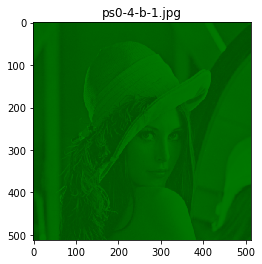

In [64]:
plt.imshow(mono_g_picture_flat)
plt.title('ps0-4-b-1.jpg')
plt.show()

#### c. Shift M1g

In [65]:
shifted_mg1 = mono_g_picture.copy()

#shift two pixels to the left, except two last columns
for i in range(512):
    for j in range(510):
        shifted_mg1[i,j] = shifted_mg1[i, j+2]
        
mpimg.imsave('./output/ps0-4-c-1.jpg', shifted_mg1)

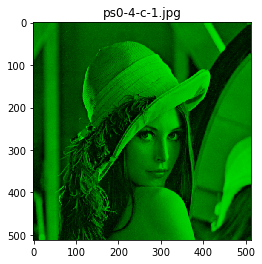

In [66]:
# plot and output resulting picture
plt.imshow(shifted_mg1)
plt.title('ps0-4-c-1.jpg')
plt.show()

#### d. M1g - shiftedM1g

In [67]:
sub_m1g = mono_g_picture - shifted_mg1

# verif that green chanel has valid value (not < 0)
verif_array = np.where(sub_m1g < 0)
print(verif_array)

mpimg.imsave('./output/ps0-4-d-1.jpg', sub_m1g)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


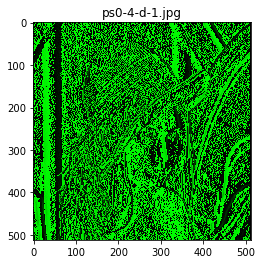

In [68]:
# plot and output resulting picture
plt.imshow(sub_m1g)
plt.title('ps0-4-d-1.jpg')
plt.show()

The value of a pixel represent its light intensity. Since negative light intensity doesn't exist, negative value for a pixel is a bug, and does not represent a physical quantity.

### 5. Noise

a. Gaussian noise on green channel - picture 1

In [69]:
gaussnoised_picture = picture_1.copy()
green_pixs = gaussnoised_picture[:,:,1]
mu, sigma, n = np.mean(green_pixs), 100, np.size(green_pixs)

# adding gaussian noise
gaussian_noise = np.random.normal(mu, sigma, n).reshape(512,512)
gaussnoised_green_pixs = green_pixs + gaussian_noise

gaussnoised_picture[:,:,1] = gaussnoised_green_pixs

misc.imsave('./output/ps0-5-a-1.jpg', gaussnoised_picture)

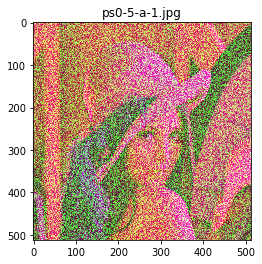

In [70]:
#plot and output resulting picture
plt.imshow(gaussnoised_picture)
plt.title('ps0-5-a-1.jpg')
plt.show()

Sigma corresponds to the standard deviation parameter used by the gaussian noise. The higher its value, the more effective the noise is.


b. Gaussian noise on blue chanel - picture 1

In [71]:
gaussnoised_picture = picture_1.copy()
blue_pixs = gaussnoised_picture[:,:,2]
mu, sigma, n = np.mean(blue_pixs), 100, np.size(blue_pixs)

gaussian_noise = np.random.normal(mu, sigma, n).reshape(512,512)
gaussnoised_blue_pixs = blue_pixs + gaussian_noise

gaussnoised_picture[:,:,2] = gaussnoised_blue_pixs

misc.imsave('./output/ps0-5-b-1.jpg', gaussnoised_picture)

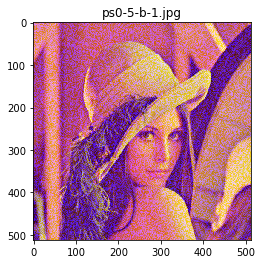

In [72]:
#plot and output resulting picture
plt.imshow(gaussnoised_picture)
plt.title('ps0-5-b-1.jpg')
plt.show()

#### d. Noise rendering 

We consider here, sigma = 100 for both gaussian noises.

In this case it all depends by what we define as better. A better noise is a noise that changes more the final rendering of a picture so it is different from the original one. In this case, the gaussian noise applied on the
green chanel of picture 1 is 'better' : i.e it has a more visible effect.

If we consider the final 'look' as an 'objective beauty' criterian : The gaussian noise applied on the blue chanel gives a better 'beautiful' rendering since it doesnt change so much the balance of the different colors on the picture. It doesn't give so much this 'error and noisy' effect.